## Startup analysis

In [8]:
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot 

def get_acquisitions():
    return pd.read_csv("data/acquisitions.csv", sep=",")
def get_degrees():
    return pd.read_csv("data/degrees.csv", sep=",")
def get_funding_rounds():
    return pd.read_csv("data/funding_rounds.csv", sep=",")
def get_funds():
    return pd.read_csv("data/funds.csv", sep=",")
def get_investments():
    return pd.read_csv("data/investments.csv", sep=",")
def get_ipos():
    return pd.read_csv("data/ipos.csv", sep=",")
def get_milestones():
    return pd.read_csv("data/milestones.csv", sep=",")
def get_objects():
    return pd.read_csv("data/objects.csv", sep=",", low_memory=False)
def get_offices():
    return pd.read_csv("data/offices.csv", sep=",")
def get_people():
    return pd.read_csv("data/people.csv", sep=",")
def get_relationships():
    return pd.read_csv("data/relationships.csv", sep=",")

# TODO: write import functions for other files
investments = get_investments()
acquistions = get_acquisitions()
degrees = get_degrees()
funding_rounds = get_funding_rounds()
funds = get_funds()
ipos = get_ipos()
milestones = get_milestones()
objects = get_objects()
offices = get_offices()
people = get_people()
relationships = get_relationships()



<BarContainer object of 10 artists>

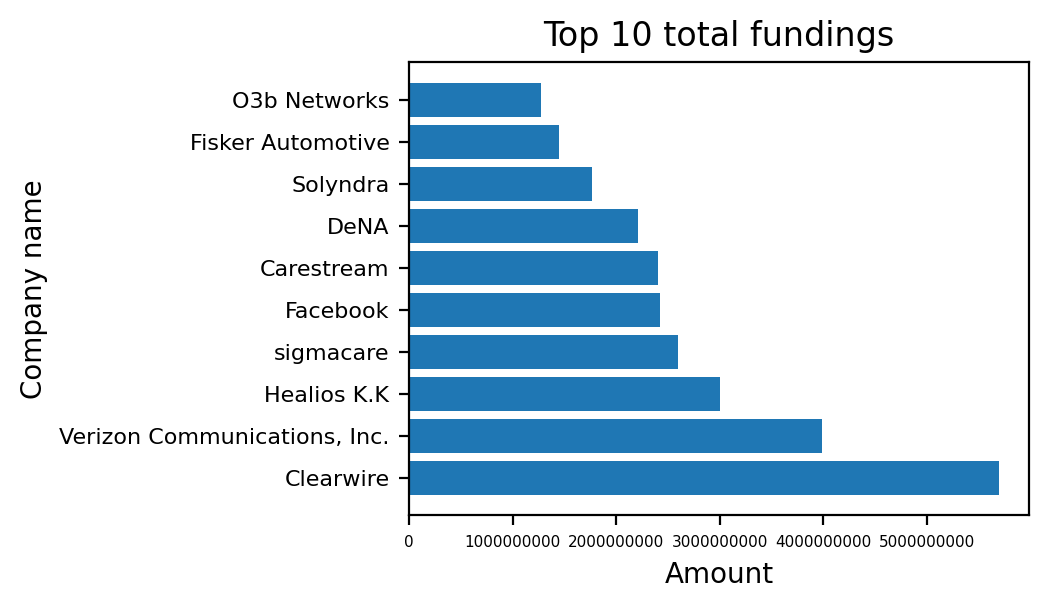

In [64]:
from matplotlib import pyplot 
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
total_fundings = total_fundings.merge(objects, left_on="object_id", right_on="id")[["name", "object_id", "raised_amount", "status"]]
total_fundings
fig, axes = pyplot.subplots(figsize=(4, 3), dpi=200)
axes.ticklabel_format(style='plain')
pyplot.xticks(fontsize=5.5)
pyplot.yticks(fontsize=8)
axes.set_title("Top 10 total fundings")
pyplot.xlabel("Amount")
pyplot.ylabel("Company name")
axes.barh(total_fundings["name"][:10], total_fundings["raised_amount"][:10])


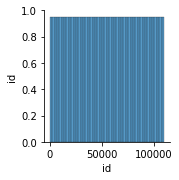

In [9]:
import seaborn as sb
sb.pairplot(degrees)

In [31]:
len(pd.unique(people["affiliation_name"]))

27248

In [46]:
len(objects[objects["funding_rounds"] > 10]["funding_rounds"])


21

In [76]:
grouped = total_fundings.groupby("status")["raised_amount"].mean()

<BarContainer object of 42 artists>

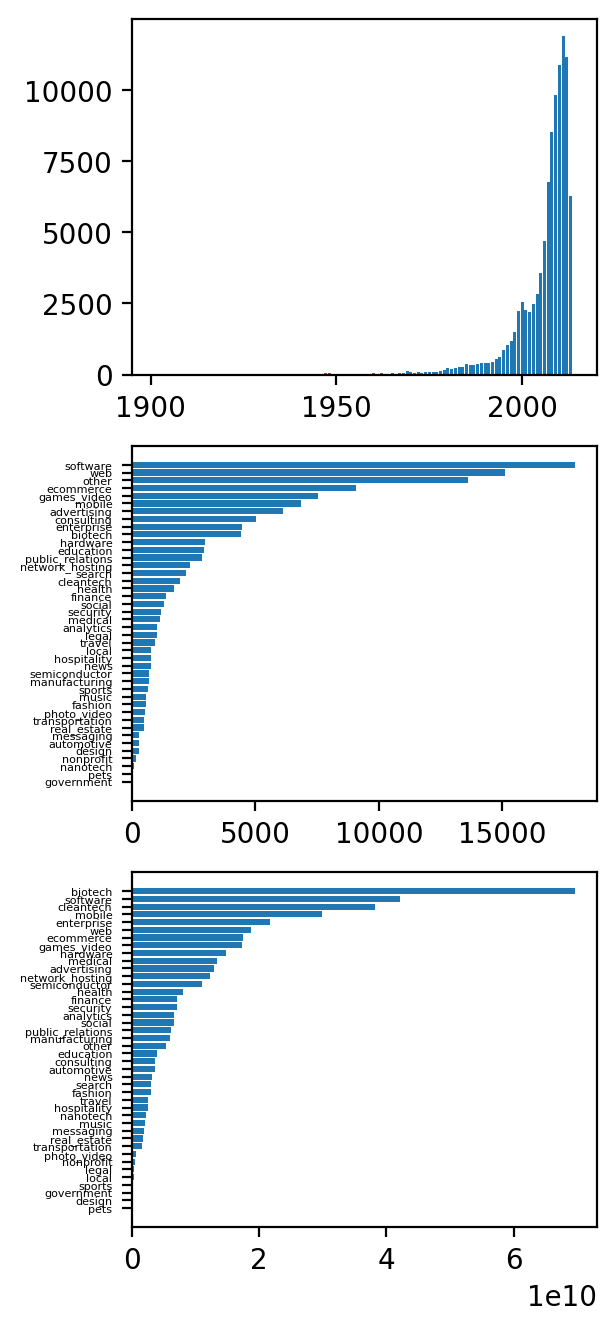

In [267]:
#Grafi: število podjetji ustvarjenih po letih, št. podjetji v vsaki inudstriji, skupna vstoa investicij v vsako industrijo
from datetime import datetime
founded_years = pd.DataFrame([datetime.strptime(str(date), '%Y-%m-%d').year for date in objects["founded_at"] if str(date) != "nan"])
count_by_year = founded_years.groupby(0).size()
count_by_category = objects.groupby("category_code").size().sort_values()
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
total_fundings_per_category = total_fundings.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").sum()["raised_amount"].sort_values()
fig, axes = pyplot.subplots(3, 1, figsize=(3, 8), dpi=200)
axes[1].tick_params(axis="y", labelsize=4)
axes[1].ticklabel_format(style='plain')
axes[2].tick_params(axis="y", labelsize=4)
axes[0].bar(count_by_year.index, count_by_year.values)
axes[1].barh(count_by_category.index, count_by_category.values)
axes[2].barh(total_fundings_per_category.index, total_fundings_per_category.values)

,mean_amount,count
mean_amount,1.00000,-0.18162
count,-0.18162,1.00000


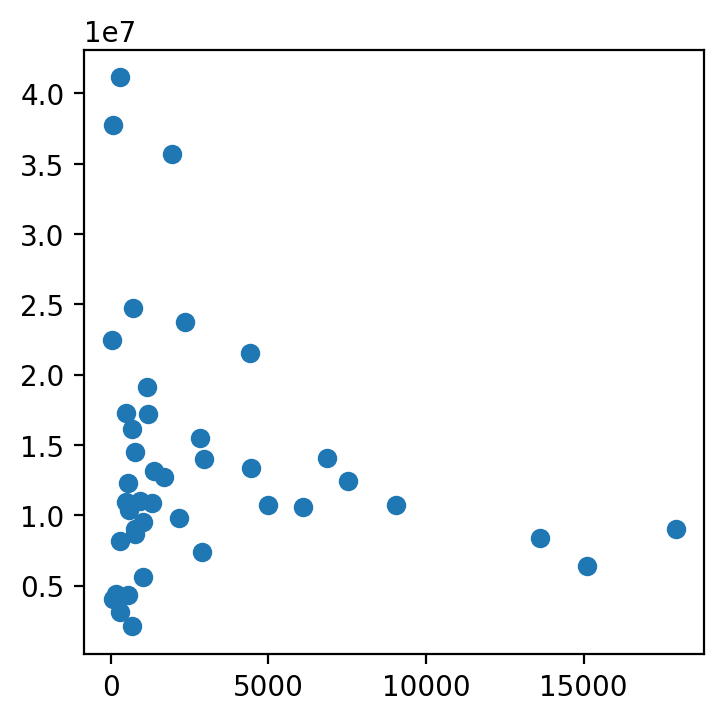

In [266]:
#Korelacija med popularnostjo industrije (skupno št. podjetji v tej industriji) in povprečno investicijo v podjetje.
count_by_category = objects.groupby("category_code").size()
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
mean_fundings_per_category = total_fundings.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").mean()["raised_amount"].sort_values()
idx = count_by_category.index.intersection(mean_fundings_per_category.index)
count_by_category_intersection = count_by_category.loc[idx]
merged = pd.merge(mean_fundings_per_category.rename("mean_amount"), count_by_category_intersection.rename("count"), left_index=True, right_index=True)
fig, axes = pyplot.subplots(figsize=(4, 4), dpi=200)
axes.scatter(merged["count"], merged["mean_amount"])
cor = merged.corr()
cor

,mean_amount,count
mean_amount,1.000000,0.499594
count,0.499594,1.000000


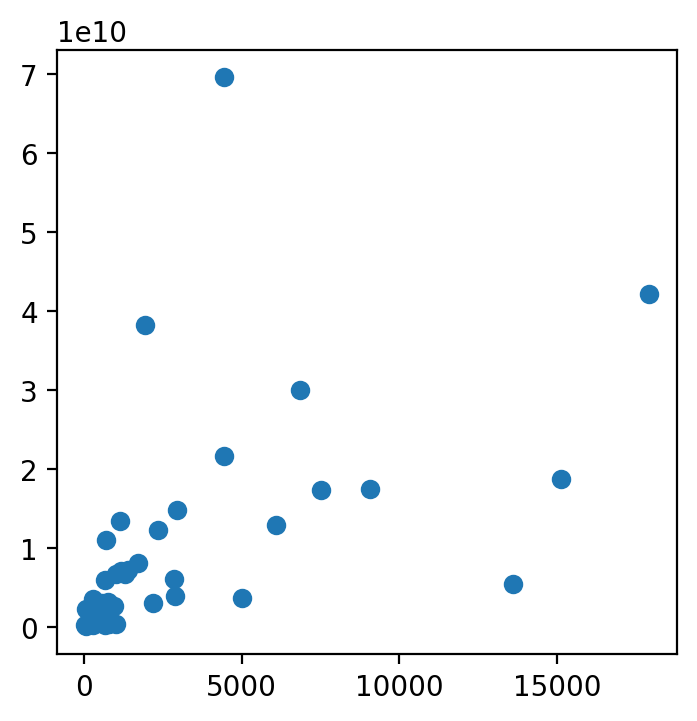

In [268]:
#Korelacija med popularnostjo industrije (skupno št. podjetji v tej industriji) in skupno vsoto investicij v to industrijo.
count_by_category = objects.groupby("category_code").size()
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
total_fundings_per_category = total_fundings.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").sum()["raised_amount"].sort_values()
idx = count_by_category.index.intersection(total_fundings_per_category.index)
count_by_category_intersection = count_by_category.loc[idx]
merged = pd.merge(total_fundings_per_category.rename("mean_amount"), count_by_category_intersection.rename("count"), left_index=True, right_index=True)
fig, axes = pyplot.subplots(figsize=(4, 4), dpi=200)
axes.scatter(merged["count"], merged["mean_amount"])
cor = merged.corr()
cor

,mean_investitons,count
mean_investitons,1.000000,0.104026
count,0.104026,1.000000


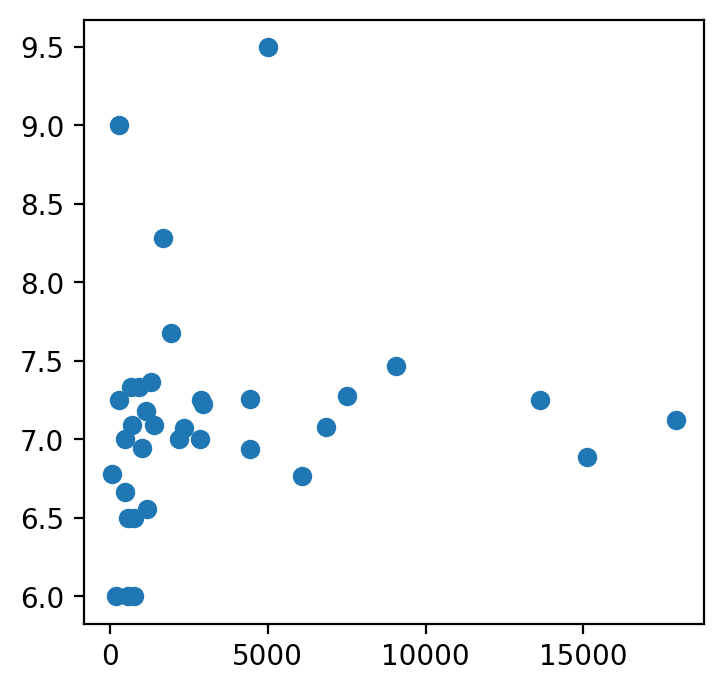

In [291]:
#Korelacija med popularnostjo industrije (skupno št. podjetji v tej industriji) in povprečnim številom investicij v to industrijo (ne vsoto investicij, dobesedno št. investicij)
count_by_category = objects.groupby("category_code").size()
num_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].count().sort_values("raised_amount", ascending=False)
num_fundings_per_category = num_fundings.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").mean()["raised_amount"].sort_values()
idx = count_by_category.index.intersection(num_fundings_per_category.index)
count_by_category_intersection = count_by_category.loc[idx]
merged = pd.merge(num_fundings_per_category.rename("mean_investitons"), count_by_category_intersection.rename("count"), left_index=True, right_index=True)
fig, axes = pyplot.subplots(figsize=(4, 4), dpi=200)
axes.scatter(merged["count"], merged["mean_investitons"])
cor = merged.corr()
cor

In [289]:
num_fundings_per_category

category_code
government          1.090909
consulting          1.294118
public_relations    1.299492
local               1.307692
other               1.346273
hospitality         1.402730
design              1.440678
real_estate         1.441558
health              1.456829
pets                1.461538
sports              1.487603
web                 1.493636
manufacturing       1.501355
fashion             1.510204
photo_video         1.541401
education           1.544090
travel              1.546218
nonprofit           1.546392
ecommerce           1.546683
games_video         1.554834
social              1.598361
software            1.607105
legal               1.634921
hardware            1.642045
search              1.669872
news                1.683486
finance             1.683824
messaging           1.685950
network_hosting     1.719536
mobile              1.724105
transportation      1.750000
music               1.760417
security            1.828502
cleantech           1.834425
